In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score
from scipy import stats
from scipy.stats import norm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_validate, GridSearchCV, StratifiedKFold
import seaborn as sns
import os

training_file_path = "train.csv"
testing_file_path = "test.csv"
df_train = pd.read_csv(training_file_path, index_col = [0])
df_test = pd.read_csv(testing_file_path, index_col = [0])

In [2]:
print("Number of rows : %s, number of columns : %s" % df_train.shape)
print()

print("Display of dataset: ")
display(df_train.head())
print()

print("Basics statistics: ")
display(df_train.describe(include='all'))
print()

separator = len(df_train)

Number of rows : 891, number of columns : 11

Display of dataset: 


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Basics statistics: 


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Flynn, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [3]:
target_variable = "Survived"

X = df_train.loc[:, [column for column in df_train if column != target_variable]]
y_train = df_train.loc[:, [target_variable]]

df = pd.concat([X, df_test])

print("Percentage of missing values: ")
display(100*df.isnull().sum()/len(df))

display(df.head())
print()

display(y_train.head())
print()

print("Percentage of survival %s \n" % (y_train.sum() / len(y_train)))

Percentage of missing values: 


Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         20.091673
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.076394
Cabin       77.463713
Embarked     0.152788
dtype: float64

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0



Percentage of survival Survived    0.383838
dtype: float64 



<AxesSubplot:xlabel='Cabin'>

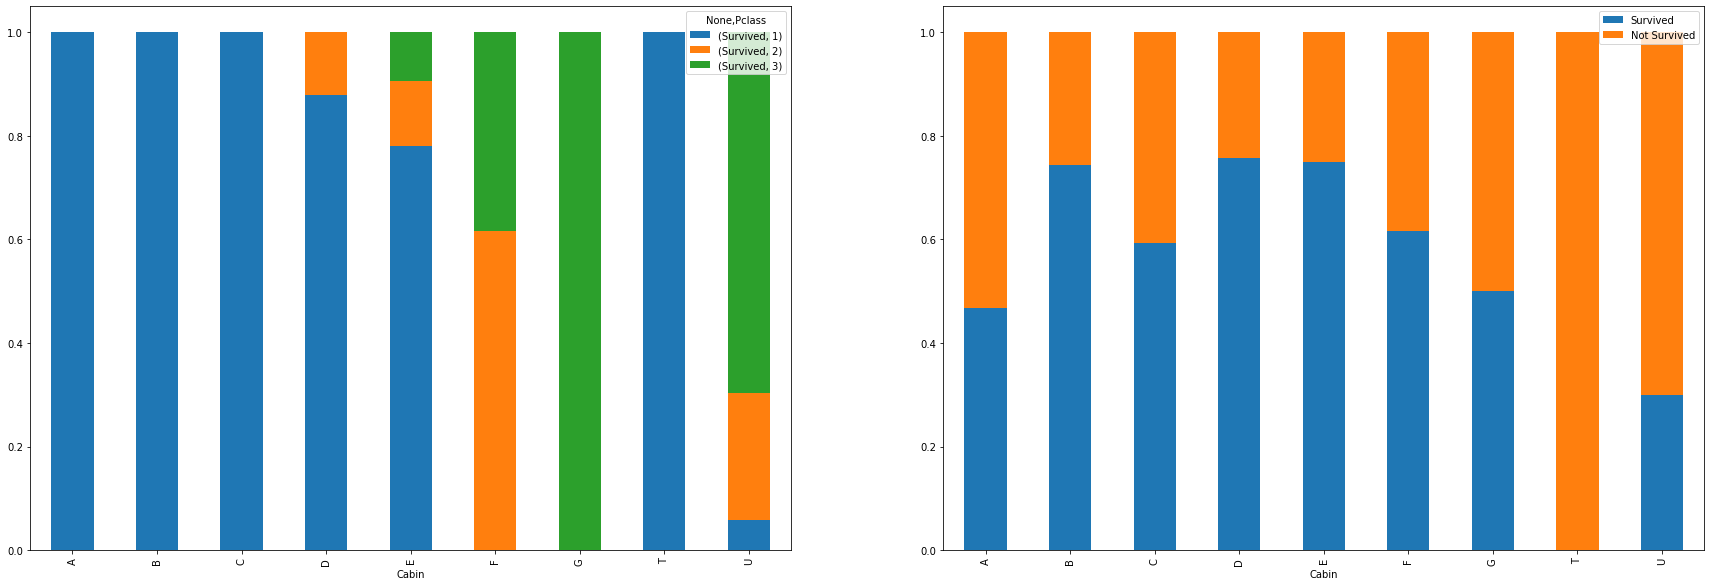

In [4]:
df["Cabin"] = df["Cabin"].fillna("Unknown").str[0]

df_plot = pd.concat([df[["Cabin", "Pclass"]], y_train["Survived"]], axis=1)
survivors = (df_plot.drop(["Pclass"], axis = 1).groupby(["Cabin"]).sum()/df_plot.drop(["Pclass"], axis = 1).groupby(["Cabin"]).count())
survivors["Not Survived"] = 1 - survivors.Survived

fig, axes = plt.subplots(1, 2, figsize = (30, 10))
(df_plot.groupby(["Cabin", "Pclass"]).count()/df_plot.groupby(["Cabin"]).count().drop(["Pclass"], axis = 1)).unstack().plot(kind = "bar", stacked=True, ax = axes[0])
survivors.plot(kind = "bar", stacked=True, ax = axes[1])

<AxesSubplot:xlabel='Cabin'>

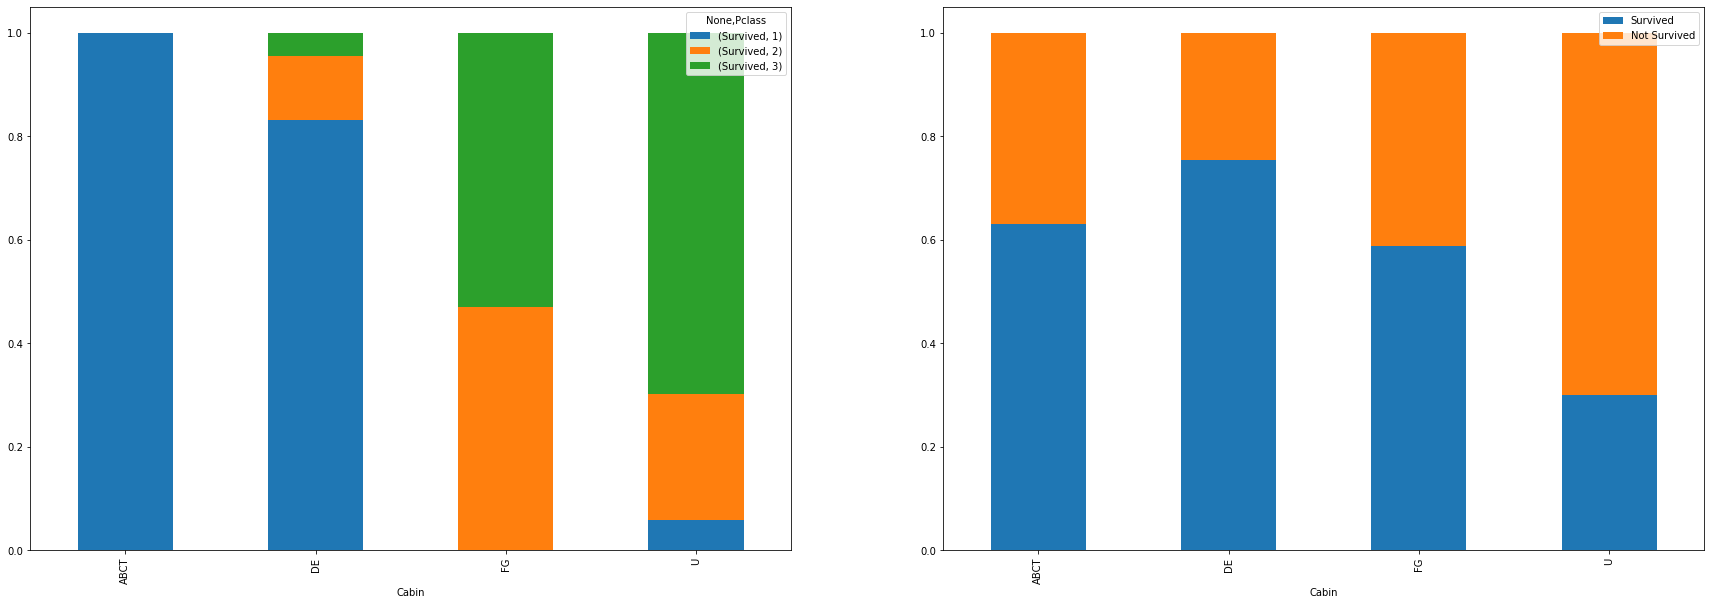

In [5]:
cabin_map = {"A": "ABCT", "B":"ABCT", "C":"ABCT", "T" : "ABCT", "D" : "DE", "E": "DE", "F": "FG", "G": "FG"}
df["Cabin"].replace(cabin_map, inplace = True)

df_plot = pd.concat([df[["Cabin", "Pclass"]], y_train["Survived"]], axis=1)

survivors = (df_plot.drop(["Pclass"], axis = 1).groupby(["Cabin"]).sum()/df_plot.drop(["Pclass"], axis = 1).groupby(["Cabin"]).count())
survivors["Not Survived"] = 1 - survivors.Survived

fig, axes = plt.subplots(1, 2, figsize = (30, 10))
(df_plot.groupby(["Cabin", "Pclass"]).count()/df_plot.groupby(["Cabin"]).count().drop(["Pclass"], axis = 1)).unstack().plot(kind = "bar", stacked=True, ax = axes[0])
survivors.plot(kind = "bar", stacked=True, ax = axes[1])

In [166]:
df["Name"]

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [6]:
df_filtered = df["Name"].str.extract(r'(?P<FamilyName>\w+(?:\s\w+){,2}), (?P<Title>\w+\s*\w*).?(?: \w+){,2}(?: \((?:\w+ (?:\w+ )?(?P<BirthName>\w+))\))?')
df = pd.concat([df_filtered, df], axis=1)

print("Title repartition before transformation : ")
display(df["Title"].value_counts())

name_dict = {"Capt":       "rare",
             "Col":        "rare",
             "Major":      "rare",
             "Dr":         "rare",
             "Rev":        "rare",
             "Jonkheer":   "rare",
             "Don":        "rare",
             "Sir" :       "rare",
             "the Countess":"rare",
             "Dona":       "rare",
             "Lady" :      "rare",
             "Mme":        "married",
             "Ms":         "married",
             "Mrs" :       "married",
             "Miss" :      "single",
             "Mlle":       "single",
             "Mr" :        "man",
             "Master" :    "kid"
            }

df["Title"].replace(name_dict, inplace=True)
df.loc[(df["Age"] <= 15) & ((df["Title"] == "man") | (df["Title"] == "single")), "Title"] = "kid"

print("Title repartition after transformation : ")
display(df["Title"].value_counts())

df["FamilyMembers"] = df["SibSp"] + df["Parch"] + 1

Title repartition before transformation : 


Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Major             2
Mlle              2
Jonkheer          1
Don               1
Capt              1
Dona              1
the Countess      1
Lady              1
Mme               1
Sir               1
Name: Title, dtype: int64

Title repartition after transformation : 


man        751
single     208
married    200
kid        121
rare        29
Name: Title, dtype: int64

In [168]:
display(df["Title"].value_counts())

man        751
single     208
married    200
kid        121
rare        29
Name: Title, dtype: int64

In [183]:
df["FamilyTicket"] = df["FamilyName"] + "_" + df["Ticket"]
display(df["FamilyTicket"].value_counts())
display(df["FamilyName"].value_counts())
df[df["FamilyName"].duplicated(keep=False)].drop_duplicates("Ticket", False).sort_values("FamilyName")

Sage_CA. 2343       11
Goodwin_CA 2144      8
Asplund_347077       7
Andersson_347082     7
Skoog_347088         6
                    ..
Nilsson_347066       1
Ashby_244346         1
Olsvigen_6563        1
Delalic_349250       1
Mernagh_368703       1
Name: FamilyTicket, Length: 1024, dtype: int64

Andersson    11
Sage         11
Asplund       8
Goodwin       8
Davies        7
             ..
Brobeck       1
Potter        1
Ward          1
Beavan        1
Cassebeer     1
Name: FamilyName, Length: 873, dtype: int64

,FamilyName,Title,BirthName,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyTicket
PassengerId,,,,,,,,,,,,,,
1237,Abelseth,single,NaN,3,"Abelseth, Miss. Karen Marie",female,16.0,0,0,348125,7.6500,U,S,Abelseth_348125
949,Abelseth,man,NaN,3,"Abelseth, Mr. Olaus Jorgensen",male,25.0,0,0,348122,7.6500,FG,S,Abelseth_348122
785,Ali,man,NaN,3,"Ali, Mr. William",male,25.0,0,0,SOTON/O.Q. 3101312,7.0500,U,S,Ali_SOTON/O.Q. 3101312
211,Ali,man,NaN,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.0500,U,S,Ali_SOTON/O.Q. 3101311
731,Allen,single,NaN,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,ABCT,S,Allen_24160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,Williams,man,NaN,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,U,S,Williams_244373
1054,Wright,single,NaN,2,"Wright, Miss. Marion",female,26.0,0,0,220844,13.5000,U,S,Wright_220844
556,Wright,man,NaN,1,"Wright, Mr. George",male,62.0,0,0,113807,26.5500,U,S,Wright_113807


In [173]:
count = df["FamilyName"].value_counts()
display(count[count > 3] )
display(df.loc[df["FamilyName"] == "Andersson", :].sort_values("Ticket"))
display(df.loc[df["FamilyName"] == "Sage", :].sort_values("Ticket"))
display(df.loc[df["FamilyName"] == "Asplund", :].sort_values("Ticket"))
display(df.loc[df["FamilyName"] == "Goodwin", :].sort_values("Ticket"))
display(df.loc[df["FamilyName"] == "Davies", :].sort_values("Ticket"))
display(df.loc[df["FamilyName"] == "Ford", :].sort_values("Ticket"))
display(df.loc[df["FamilyName"] == "Carter", :].sort_values("Ticket"))
display(df.loc[df["FamilyName"] == "Brown", :].sort_values("Ticket"))
display(df.loc[df["FamilyName"] == "Fortune", :].sort_values("Ticket"))

Andersson        11
Sage             11
Asplund           8
Goodwin           8
Davies            7
Ford              6
Carter            6
Brown             6
Fortune           6
Rice              6
Skoog             6
Panula            6
Johnson           6
Smith             6
Williams          5
Thomas            5
Lefebre           5
Ryerson           5
Palsson           5
Kelly             5
Dean              4
Elias             4
Herman            4
Olsen             4
Becker            4
Hart              4
Ware              4
Cacic             4
Gustafsson        4
Johansson         4
Hocking           4
Goldsmith         4
Laroche           4
Harper            4
Hansen            4
Jensen            4
West              4
Johnston          4
Harris            4
Baclini           4
Vander Planke     4
Allison           4
Boulos            4
Name: FamilyName, dtype: int64

,FamilyName,Title,BirthName,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,,
69,Andersson,single,NaN,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,U,S
1212,Andersson,man,NaN,3,"Andersson, Mr. Johan Samuel",male,26.0,0,0,347075,7.7750,U,S
14,Andersson,man,NaN,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,U,S
120,Andersson,kid,NaN,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,U,S
542,Andersson,kid,NaN,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,U,S
543,Andersson,kid,NaN,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,U,S
611,Andersson,married,Brogren,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,U,S
814,Andersson,kid,NaN,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,U,S
851,Andersson,kid,NaN,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,U,S


,FamilyName,Title,BirthName,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,,
160,Sage,kid,NaN,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,U,S
181,Sage,single,NaN,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,U,S
202,Sage,man,NaN,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,U,S
325,Sage,man,NaN,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,U,S
793,Sage,single,NaN,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,U,S
847,Sage,man,NaN,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,U,S
864,Sage,single,NaN,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,U,S
1080,Sage,single,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,U,S
1234,Sage,man,NaN,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,U,S


,FamilyName,Title,BirthName,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,,
26,Asplund,married,NaN,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,U,S
183,Asplund,kid,NaN,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,U,S
234,Asplund,kid,NaN,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,U,S
262,Asplund,kid,NaN,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,U,S
1046,Asplund,kid,NaN,3,"Asplund, Master. Filip Oscar",male,13.0,4,2,347077,31.3875,U,S
1066,Asplund,man,NaN,3,"Asplund, Mr. Carl Oscar Vilhelm Gustafsson",male,40.0,1,5,347077,31.3875,U,S
1271,Asplund,kid,NaN,3,"Asplund, Master. Carl Edgar",male,5.0,4,2,347077,31.3875,U,S
1118,Asplund,man,NaN,3,"Asplund, Mr. Johan Charles",male,23.0,0,0,350054,7.7958,U,S


,FamilyName,Title,BirthName,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,,
60,Goodwin,kid,NaN,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,U,S
72,Goodwin,single,NaN,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,U,S
387,Goodwin,kid,NaN,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,U,S
481,Goodwin,kid,NaN,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,U,S
679,Goodwin,married,Tyler,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,U,S
684,Goodwin,kid,NaN,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,U,S
1031,Goodwin,man,NaN,3,"Goodwin, Mr. Charles Frederick",male,40.0,1,6,CA 2144,46.9,U,S
1032,Goodwin,kid,NaN,3,"Goodwin, Miss. Jessie Allis",female,10.0,5,2,CA 2144,46.9,U,S


,FamilyName,Title,BirthName,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,,
566,Davies,man,NaN,3,"Davies, Mr. Alfred J",male,24.0,2,0,A/4 48871,24.15,U,S
901,Davies,man,NaN,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.15,U,S
1079,Davies,man,NaN,3,"Davies, Mr. Joseph",male,17.0,2,0,A/4 48873,8.05,U,S
550,Davies,kid,NaN,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.75,U,S
1222,Davies,married,NaN,2,"Davies, Mrs. John Morgan (Elizabeth Agnes Mary...",female,48.0,0,2,C.A. 33112,36.75,U,S
386,Davies,man,NaN,2,"Davies, Mr. Charles Henry",male,18.0,0,0,S.O.C. 14879,73.50,U,S
1039,Davies,man,NaN,3,"Davies, Mr. Evan",male,22.0,0,0,SC/A4 23568,8.05,U,S


,FamilyName,Title,BirthName,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,,
1181,Ford,man,NaN,3,"Ford, Mr. Arthur",male,NaN,0,0,A/5 1478,8.050,U,S
87,Ford,man,NaN,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.375,U,S
148,Ford,kid,NaN,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.375,U,S
437,Ford,single,NaN,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.375,U,S
737,Ford,married,Watson,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.375,U,S
1059,Ford,man,NaN,3,"Ford, Mr. Edward Watson",male,18.0,2,2,W./C. 6608,34.375,U,S


,FamilyName,Title,BirthName,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,,
391,Carter,man,NaN,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0,ABCT,S
436,Carter,kid,NaN,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0,ABCT,S
764,Carter,married,Polk,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0,ABCT,S
803,Carter,kid,NaN,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0,ABCT,S
250,Carter,rare,NaN,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.0,U,S
855,Carter,married,Hughes,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.0,U,S


,FamilyName,Title,BirthName,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,,
1248,Brown,married,Lamson,1,"Brown, Mrs. John Murray (Caroline Lane Lamson)",female,59.0,2,0,11769,51.4792,ABCT,S
346,Brown,single,NaN,2,"Brown, Miss. Amelia ""Mildred""",female,24.0,0,0,248733,13.0000,FG,S
671,Brown,married,NaN,2,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",female,40.0,1,1,29750,39.0000,U,S
685,Brown,man,NaN,2,"Brown, Mr. Thomas William Solomon",male,60.0,1,1,29750,39.0000,U,S
1067,Brown,kid,NaN,2,"Brown, Miss. Edith Eileen",female,15.0,0,2,29750,39.0000,U,S
195,Brown,married,Tobin,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,ABCT,C


,FamilyName,Title,BirthName,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,,
28,Fortune,man,NaN,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,ABCT,S
89,Fortune,single,NaN,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,ABCT,S
342,Fortune,single,NaN,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,ABCT,S
439,Fortune,man,NaN,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,ABCT,S
945,Fortune,single,NaN,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0,ABCT,S
961,Fortune,married,McDougald,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0,ABCT,S


In [7]:
# Filling missing values in Age
df["Age"] = df.groupby(["Sex", "Pclass", "Title"])["Age"].transform(lambda x: x.fillna(x.median()))

# Filling missing Fare values
df["Fare"] = df.groupby(["Ticket"])["Fare"].transform(lambda x: x/x.count())
df["Fare"] = df.groupby(["Pclass"])["Fare"].transform(lambda x: x.fillna(x.median()))

In [9]:
useless_cols = ["Pclass", "Name", "Ticket", "SibSp", "Parch"]
numeric_features = ["Age", "Fare", "FamilyMembers"] # Positions of numeric columns in X_train/X_test
categorical_features = ["Cabin", "Title", "Sex", "Embarked"] # Positions of categorical columns in X_train/X_test

df_test = df.drop(useless_cols, axis=1)

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by most frequent value
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

df_test = preprocessor.fit_transform(df_test)
X_train = df_test[:separator, :]
X_test = df_test[separator:, :]

rf = RandomForestClassifier(random_state = 42, n_jobs = -1)

kf = StratifiedKFold(5, shuffle=True, random_state=42)

grid_values = {"n_estimators" : range(0, 200, 10), 
              "max_depth": [None]}

grid_clf_acc = GridSearchCV(rf, param_grid = grid_values, cv = kf, n_jobs = -1)
grid_clf_acc.fit(X_train, y_train)

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Grid best parameter (max. accuracy):  {'max_depth': None, 'n_estimators': 130}
Grid best score (accuracy):  0.8204067541271733


In [ ]:
df.loc[df.Age <= df[df.Title == "boy"].Age.max(), "Sex"] = "child"
df["PclassGender"] = "P" + df.Pclass.astype(str) + df.Sex

<Figure size 432x288 with 0 Axes>

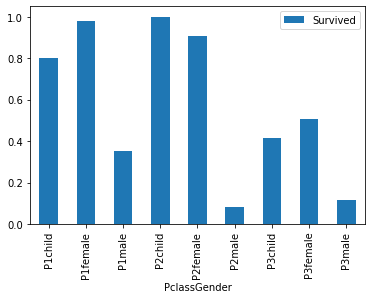

In [5862]:
plt.figure()
plot = pd.DataFrame({"PclassGender": df.PclassGender, "Survived":y_train})
(plot.groupby("PclassGender").sum() / plot.groupby("PclassGender").count()).plot(kind = "bar")

In [5865]:
df["FamilySize"] = df.Parch + df.SibSp + 1
df.Ticket = df.Ticket.str.replace('[^\w\s]','')
df["Surname"] = df.Name.str.split(',', expand=True)[0]
df["GroupId"] = (df.Surname + "-" + df.Pclass.astype(str) + "-" + df.Ticket.str[:-2])
df["FamilyGroup"] = df.groupby(["GroupId"])["Name"].transform(lambda x: x.count())

In [5866]:
parenthesis = df[(df.FamilyGroup % df.FamilySize !=0) & (df.Title == "married") & (df.Name.str.contains("(", regex=False))]
parenthesis["MaidenName"] = parenthesis.Name.str.extract('.*\((.*)\).*')
parenthesis["MaidenName"] = parenthesis.MaidenName.apply(lambda x: pd.Series(x.split(" ")[::-1]))
maidenName = parenthesis[parenthesis.MaidenName.isin(df.Surname)][["Surname", "MaidenName", "Pclass"]]
surname = df[df.Surname.isin(maidenName.MaidenName)].groupby(["Surname"]).mean().Pclass.astype(int).astype(str).to_frame()
surname.Pclass = surname.index + surname.Pclass
maidenName["PclassMName"] =  maidenName.MaidenName + maidenName.Pclass.astype(str)
maidenName = maidenName[maidenName.PclassMName.isin(surname.Pclass)].drop(["PclassMName"], axis = 1)
maidenName["Key"] = maidenName.Surname + " " + maidenName.MaidenName
maidenName = maidenName[maidenName.Surname != "Potter"]
maidenName = pd.concat([maidenName[["Surname", "Pclass", "Key"]].set_index(["Surname"]), 
                    maidenName[["MaidenName", "Pclass", "Key"]].set_index(["MaidenName"])]).reset_index()
df = pd.merge(df.reset_index(), maidenName, left_on= ["Surname", "Pclass"], 
              right_on= ["index", "Pclass"], how = 'outer').set_index("PassengerId").sort_index()
df.loc[[311, 380, 714, 807, 877, 1121], "Key"] = np.nan
df.Key.fillna("None", inplace = True)
df.loc[df.Key != "None", "FamilyGroup"] = df.groupby(["Key"])["FamilySize"].transform(lambda x: x.mean())
df.loc[df.Key != "None", "GroupId"] = df.Key

C:\Users\silco\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\silco\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [5867]:
df["TicketGroup"] = df.groupby(["Ticket"])["Name"].transform(lambda x: x.count())
df.loc[df.TicketGroup > df.FamilyGroup, "GroupId"] = df.Ticket

In [5868]:
survivors = df.copy()
survivors["Survived"] = y_train
survivors["WC"] = ((survivors.Sex == "female") | (survivors.Sex == "child"))
survivors["WCSurvived"] = ((survivors.WC == 1) & (survivors.Survived == 1)).astype(int)
survivors["Tsize"] = survivors.groupby("Ticket")["Name"].transform(lambda x: x.count())
survivors["SumGroupSurvived"] = survivors.groupby("Ticket")["Survived"].transform(lambda x: x.sum())
survivors["Fsize"] = survivors.groupby("GroupId")["Ticket"].transform(lambda x: x.count())
survivors["SumFamSurvived"] = survivors.groupby("GroupId")["Survived"].transform(lambda x: x.sum())
survivors["WC"] = survivors.groupby("Ticket")["WC"].transform(lambda x: x.sum())
survivors["WCSurvived"] = survivors.groupby("Ticket")["WCSurvived"].transform(lambda x: x.sum())
survivors.loc[((survivors.Tsize > 1) & (survivors.SumGroupSurvived > 0)), "AnyGroupSurvivors"] = 1
survivors.loc[((survivors.Fsize > 1) & (survivors.SumFamSurvived > 0)), "AnyFamSurvivors"] = 1
survivors.loc[((survivors.Tsize > 1) & (survivors.SumGroupSurvived == 0)), "NoSurvivors"] = 1
survivors.loc[((survivors.WC > 1) & (survivors.WC == survivors.WCSurvived)), "WCSurvivors"] = 1
survivors.loc[((survivors.WC > 1) & (survivors.WCSurvived == 0)), "WCDied"] = 1
survivors.AnyGroupSurvivors.fillna(0, inplace = True)
survivors.AnyFamSurvivors.fillna(0, inplace = True)
survivors.WCSurvivors.fillna(0, inplace = True)
survivors.WCDied.fillna(0, inplace = True)
survivors.NoSurvivors.fillna(0, inplace = True)
df["AnySurvivors"] = (survivors["AnyGroupSurvivors"].astype(bool) | survivors["AnyFamSurvivors"].astype(bool)).astype(int)
df["AnyFamSurvivors"] = survivors["AnyFamSurvivors"]
df["WCSurvivors"] = survivors["WCSurvivors"]
df["WCDied"] = survivors["WCDied"]
df["NoSurvivors"] = survivors["NoSurvivors"]

In [5869]:
df.AnyGroupSurvivors.value_counts()

AttributeError: 'DataFrame' object has no attribute 'AnyGroupSurvivors'

In [5870]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_validate, GridSearchCV, StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

numeric_features = [0, 2, 3, 4, 5] # Positions of numeric columns in X_train/X_test
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # missing values in Age will be replaced by columns' mean
    ('scaler', StandardScaler())
])

categorical_features = [1, 6] # Positions of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(fill_value=0)), # missing values will be replaced by most frequent value
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

select = df[["Fare", "PclassGender", "TicketGroup", "FamilyGroup", "AnySurvivors"]]
select.fillna(0, inplace = True)
select = pd.get_dummies(select)

X_train = select[select.index.isin(df_train.index)].sort_index()
X_test = select[select.index.isin(df_test.index)].sort_index()

rf = RandomForestClassifier(random_state = 42, n_jobs = -1)

kf = StratifiedKFold(5, shuffle=True, random_state=42)

grid_values = {"n_estimators" : [100], 
              "max_depth": [None]}

grid_clf_acc = GridSearchCV(rf, param_grid = grid_values, cv = kf, n_jobs = -1)
grid_clf_acc.fit(X_train, y_train)

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

#score = cross_validate(rf, X_train, y_train, cv = kf, scoring = ["accuracy", "precision", "recall", "f1"])

#print("accuracy : " + str(score["test_accuracy"].mean()) + " recall : " + str(score["test_recall"].mean()) + 
      #" precision : "+ str(score["test_precision"].mean()) )

C:\Users\silco\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


Grid best parameter (max. accuracy):  {'max_depth': None, 'n_estimators': 100}
Grid best score (accuracy):  0.8619528619528619


In [ ]:
y_pred = grid_clf_acc.best_estimator_.predict(X_test)

In [ ]:
PassengerId =np.array(X_test.index).astype(int)
my_prediction = pd.DataFrame(y_pred, PassengerId, columns = ["Survived"])

my_prediction.to_csv("prediction_sample.csv", index_label = ["PassengerId"])